# Lab 6 - Model comparison

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
F = len('Adrian')
L = len('Poniatowski')
N = (L+F)*100

## Exercise 1 - generate data

In [3]:
data_sim = {'N': N}

In [4]:
model1=CmdStanModel(stan_file='code_1.stan')

R = 1000
sim=model1.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_1 = sim.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [5]:
model2=CmdStanModel(stan_file='code_2.stan')

R = 1000
sim=model2.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_2 = sim.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:15 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


## Exercise 2 - compare normal and student models for data from first file

In [6]:
data_sim_2 = {'N':N,
              'y':df_1.iloc[666, 3:].values}


In [7]:
model3=CmdStanModel(stan_file='code_3.stan')

R = 1000
sim3=model3.sample(data=data_sim_2, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_3 = sim3.draws_pd()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [8]:
model4=CmdStanModel(stan_file='code_4.stan')

R = 1000
sim4=model4.sample(data=data_sim_2, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_4 = sim4.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [9]:
inf_3 = az.from_cmdstanpy(sim3)
inf_4 = az.from_cmdstanpy(sim4)

In [10]:
compare_dict = {"normal": inf_3, "student": inf_4}
loo_compare = az.compare(compare_dict, ic='loo')
loo_compare.head()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
normal,0,-3501.44239,0.0,0.0000,0.977596,153.123324,0.000000,True,log
student,1,-3718.74989,0.0,217.3075,0.022404,18.311921,141.591216,True,log


In [11]:
waic_compare = az.compare(compare_dict, ic='waic')
waic_compare.head()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
normal,0,-3501.44239,1.568403e-27,0.0000,0.977596,153.123324,0.000000,False,log
student,1,-3718.74989,4.740561e-28,217.3075,0.022404,18.311921,141.591216,False,log


<AxesSubplot:xlabel='Log'>

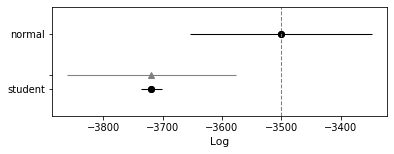

In [12]:
az.plot_compare(loo_compare)

<AxesSubplot:xlabel='Log'>

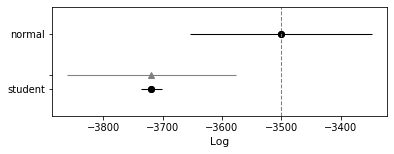

In [13]:
az.plot_compare(waic_compare)

After comparing results it seems that both criteria (loo and waic) looks very similar. We can see that normal model fits the data better than model with student t-distribution.

## Excercise 3 - compare models with different number of predictors

In [14]:
lst = df_2.iloc[500:501, 2:1702].values.T

lst.shape


(1700, 1)

In [15]:
X1 = df_2.iloc[500:501, 2:1702].values.T
X2 = df_2.iloc[500:502, 1702:3402].values.T
X3 = df_2.iloc[500:503, 3402:5102].values.T


data_sim_3_1 = {'N':N,
                'K':1,
                'y':df_2.iloc[500, 5105:].values,
                'X':X1}
data_sim_3_2 = {'N':N,
                'K':2,
                'y':df_2.iloc[500, 5105:].values,
                'X':X2}
data_sim_3_3 = {'N':N,
                'K':3,
                'y':df_2.iloc[500, 5105:].values,
                'X':X3}

In [16]:
model5=CmdStanModel(stan_file='code_5.stan')

R = 1000
sim5_1=model5.sample(data=data_sim_3_1, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_5_1 = sim5_1.draws_pd()

sim5_2=model5.sample(data=data_sim_3_2, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_5_2 = sim5_2.draws_pd()

sim5_3=model5.sample(data=data_sim_3_3, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=123)

df_5_3 = sim5_3.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:08 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:09 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:17 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [17]:
inf_5_1 = az.from_cmdstanpy(sim5_1)
inf_5_2 = az.from_cmdstanpy(sim5_2)
inf_5_3 = az.from_cmdstanpy(sim5_3)

In [18]:
compare_dict = {"1_predictor": inf_5_1, "2_predictor": inf_5_2, "3_predictor": inf_5_3}
loo_compare = az.compare(compare_dict, ic='loo')
loo_compare.head()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1_predictor,0,-3526.45432,0.0,0.00000,1.000000e+00,30.175929,0.000000,True,log
2_predictor,1,-3838.08770,0.0,311.63338,1.095647e-09,40.991718,24.039428,True,log
3_predictor,2,-4246.95347,0.0,720.49915,0.000000e+00,51.516995,39.741965,True,log


<AxesSubplot:xlabel='Log'>

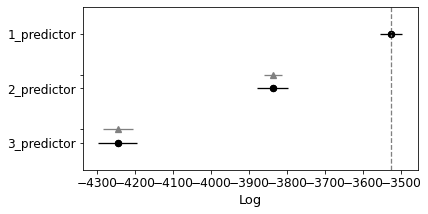

In [19]:
az.plot_compare(loo_compare)

In [20]:
waic_compare = az.compare(compare_dict, ic='waic')
waic_compare.head()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
1_predictor,0,-3526.45432,4.732672e-28,0.00000,1.000000e+00,30.175929,0.000000,False,log
2_predictor,1,-3838.08770,6.246792e-28,311.63338,1.095647e-09,40.991718,24.039428,False,log
3_predictor,2,-4246.95347,7.069673e-28,720.49915,0.000000e+00,51.516995,39.741965,False,log


<AxesSubplot:xlabel='Log'>

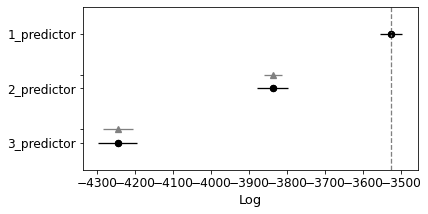

In [21]:
az.plot_compare(waic_compare)

From compare plots for loo and waic criteria we can see that the best fit is for model with one predictor.